<a href="https://colab.research.google.com/github/MykoChan123/AdvancePredictiveAnalytiics/blob/main/group3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA SELECTION:**

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/MykoChan123/AdvancePredictiveAnalytiics/main/Customers.csv'
df = pd.read_csv(url)


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1965 non-null   int64 
 1   Gender                  1965 non-null   object
 2   Age                     1965 non-null   int64 
 3   Annual Income ($)       1965 non-null   int64 
 4   Spending Score (1-100)  1965 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         1965 non-null   int64 
 7   Family Size             1965 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.2+ KB
None


In [ ]:
print(df.describe())

        CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  1965.000000  1965.000000        1965.000000             1965.000000   
mean   1000.309924    48.894656      110616.009669               51.078880   
std     578.443714    28.414889       45833.860195               27.977176   
min       1.000000     0.000000           0.000000                0.000000   
25%     498.000000    25.000000       74350.000000               28.000000   
50%    1000.000000    48.000000      109759.000000               50.000000   
75%    1502.000000    73.000000      149095.000000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      1965.000000  1965.000000  
mean          4.092621     3.757252  
std           3.926459     1.968335  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.00

**Data Preprocessing:**

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)


CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


<Axes: xlabel='Spending Score (1-100)'>

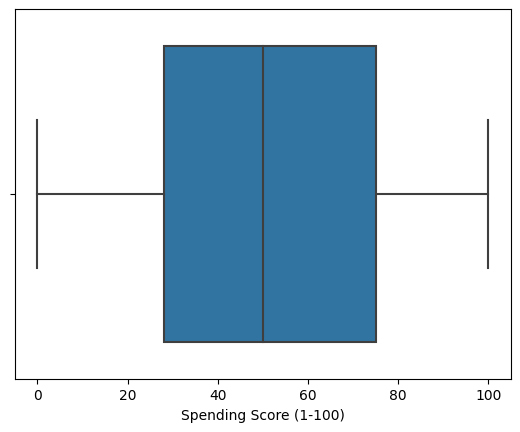

In [ ]:
# Check for outliers using box plots
import seaborn as sns
sns.boxplot(x=df['Spending Score (1-100)'])

In [ ]:
from scipy.stats import zscore
z_scores = zscore(df['Spending Score (1-100)'])
df_no_outliers = df[(z_scores < 3) & (z_scores > -3)]

In [ ]:
print(df.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

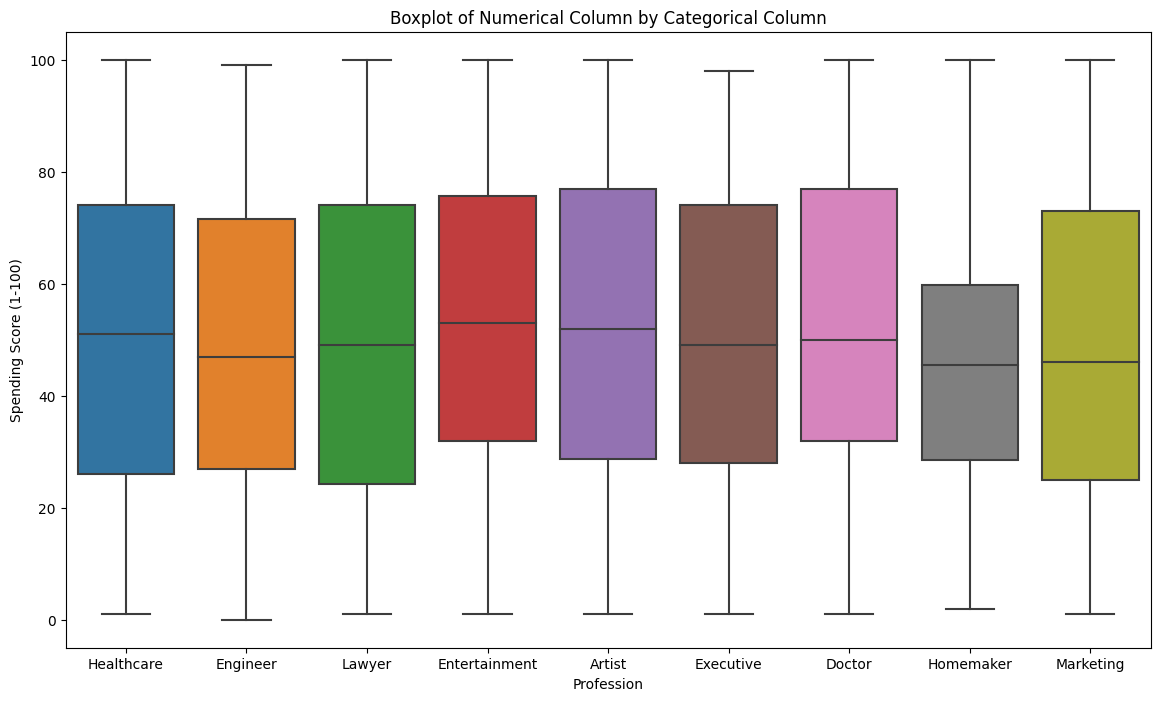

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Profession', y='Spending Score (1-100)', data=df)
plt.title('Boxplot of Numerical Column by Categorical Column')
plt.show()

**Feature Engineering:**

In [ ]:

# Create a new feature 'Age Group'
bins = [18, 25, 35, 45, 55, 65, 100]  # Define age group bins
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']  # Labels for each age group
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify the new feature
print(df[['CustomerID', 'Age', 'Age Group']].head())

   CustomerID  Age Age Group
0           1   19     18-25
1           2   21     18-25
2           3   20     18-25
3           4   23     18-25
4           5   31     26-35


In [ ]:


# One-hot encode 'Gender'
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender', drop_first=True)

# One-hot encode 'Profession'
df = pd.get_dummies(df, columns=['Profession'], prefix='Profession')

# One-hot encode 'Age Group' if you created it in the previous step
# Note: If 'Age Group' is not present, you can create it based on the Age column
# bins = [18, 25, 35, 45, 55, 65, 100]
# labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
# df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df = pd.get_dummies(df, columns=['Age Group'], prefix='Age Group')

# Display the updated DataFrame
print(df.head())

   CustomerID  Age  Annual Income ($)  Spending Score (1-100)  \
0           1   19              15000                      39   
1           2   21              35000                      81   
2           3   20              86000                       6   
3           4   23              59000                      77   
4           5   31              38000                      40   

   Work Experience  Family Size  Gender_Male  Profession_Artist  \
0                1            4            1                  0   
1                3            3            1                  0   
2                1            1            0                  0   
3                0            2            0                  0   
4                2            6            0                  0   

   Profession_Doctor  Profession_Engineer  ...  Profession_Healthcare  \
0                  0                    0  ...                      1   
1                  0                    1  ...              

**Model Development:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



X = df.drop(['CustomerID', 'Spending Score (1-100)'], axis=1)

# Select the target variable
y = df['Spending Score (1-100)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_scaled, y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test_scaled)

# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)

# Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_model.predict(X_test_scaled)

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluate models
def evaluate_model(model, predictions, label):
    accuracy = accuracy_score(y_test, predictions)
    print(f'{label} Model:')
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, predictions))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, predictions))
    print('\n')

evaluate_model(logistic_regression_model, logistic_regression_predictions, 'Logistic Regression')
evaluate_model(decision_tree_model, decision_tree_predictions, 'Decision Tree')
evaluate_model(random_forest_model, random_forest_predictions, 'Random Forest')
evaluate_model(svm_model, svm_predictions, 'Support Vector Machine')


Logistic Regression Model:
Accuracy: 0.0051
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         6
          17  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Drop unnecessary columns (e.g., CustomerID) and the target variable
X = df.drop(['CustomerID', 'Spending Score (1-100)'], axis=1)

# Select the target variable
y = df['Spending Score (1-100)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RandomForest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_model.predict(X_test_scaled)

# MLP (Multi-Layer Perceptron) Neural Network
neural_network_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
neural_network_model.fit(X_train_scaled, y_train)
neural_network_predictions = neural_network_model.predict(X_test_scaled)

# Evaluate models
def evaluate_model(model, predictions, label):
    accuracy = accuracy_score(y_test, predictions)
    print(f'{label} Model:')
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, predictions))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, predictions))
    print('\n')

evaluate_model(random_forest_model, random_forest_predictions, 'Random Forest')
evaluate_model(neural_network_model, neural_network_predictions, 'Neural Network')


Random Forest Model:
Accuracy: 0.0102
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         1
          16       0.20      0.17      0.18         6
          17       0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being s

**Model Evaluation:**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate models
def evaluate_model(model, predictions, label):
    accuracy = accuracy_score(y_test, predictions)
    print(f'{label} Model:')
    print(f'Accuracy: {accuracy:.4f}')

    # Classification Report
    report = classification_report(y_test, predictions)
    print('Classification Report:')
    print(report)

    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, predictions)
    print('Confusion Matrix:')
    print(confusion_mat)
    print('\n')

# Assuming you've already trained and obtained predictions for each model
evaluate_model(logistic_regression_model, logistic_regression_predictions, 'Logistic Regression')
evaluate_model(decision_tree_model, decision_tree_predictions, 'Decision Tree')
evaluate_model(random_forest_model, random_forest_predictions, 'Random Forest')
evaluate_model(svm_model, svm_predictions, 'Support Vector Machine')
evaluate_model(gradient_boosting_model, gradient_boosting_predictions, 'Gradient Boosting')
evaluate_model(neural_network_model, neural_network_predictions, 'Neural Network')


Logistic Regression Model:
Accuracy: 0.0051
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         6
          17  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


# Drop unnecessary columns (e.g., CustomerID) and the target variable
X = df.drop(['CustomerID', 'Spending Score (1-100)'], axis=1)

# Select the target variable
y = df['Spending Score (1-100)']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# RandomForest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_cv_scores = cross_val_score(random_forest_model, X_scaled, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

print("Random Forest Cross-Validation Scores:")
print(random_forest_cv_scores)
print(f"Average Accuracy: {random_forest_cv_scores.mean():.4f}\n")

# MLP (Multi-Layer Perceptron) Neural Network
neural_network_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
neural_network_cv_scores = cross_val_score(neural_network_model, X_scaled, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

print("Neural Network Cross-Validation Scores:")
print(neural_network_cv_scores)
print(f"Average Accuracy: {neural_network_cv_scores.mean():.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Random Forest Cross-Validation Scores:
[0.01017812 0.01017812 0.00254453 0.00254453 0.00763359]
Average Accuracy: 0.0066



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stoch

Neural Network Cross-Validation Scores:
[0.01017812 0.01017812 0.00508906 0.02798982 0.02290076]
Average Accuracy: 0.0153


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


**Hyperparameter Tuning:**

In [ ]:
from sklearn.model_selection import GridSearchCV


# Drop unnecessary columns (e.g., CustomerID) and the target variable
X = df.drop(['CustomerID', 'Spending Score (1-100)'], axis=1)

# Select the target variable
y = df['Spending Score (1-100)']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# RandomForest Classifier Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_forest_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(random_forest_model, param_grid_rf, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
grid_search_rf.fit(X_scaled, y)

print("Random Forest Best Parameters:")
print(grid_search_rf.best_params_)
print(f"Best Accuracy: {grid_search_rf.best_score_:.4f}\n")

# MLP (Multi-Layer Perceptron) Neural Network Hyperparameter Tuning
param_grid_nn = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (32, 16)],
    'activation': ['relu', 'tanh'],
    'max_iter': [500, 1000],
    'alpha': [0.0001, 0.001, 0.01]
}

neural_network_model = MLPClassifier(random_state=42)
grid_search_nn = GridSearchCV(neural_network_model, param_grid_nn, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
grid_search_nn.fit(X_scaled, y)

print("Neural Network Best Parameters:")
print(grid_search_nn.best_params_)
print(f"Best Accuracy: {grid_search_nn.best_score_:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'`

Random Forest Best Parameters:
{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.0142



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(['CustomerID', 'Spending Score (1-100)'], axis=1)

# Select the target variable
y = df['Spending Score (1-100)']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Classifier Grid Search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_forest_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(random_forest_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Random Forest Grid Search Best Parameters:")
print(grid_search_rf.best_params_)
print(f"Best Accuracy: {grid_search_rf.best_score_:.4f}")

# MLP Neural Network Grid Search
param_grid_nn = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (32, 16)],
    'activation': ['relu', 'tanh'],
    'max_iter': [500, 1000],
    'alpha': [0.0001, 0.001, 0.01]
}

neural_network_model = MLPClassifier(random_state=42)
grid_search_nn = GridSearchCV(neural_network_model, param_grid_nn, cv=5, scoring='accuracy')
grid_search_nn.fit(X_train, y_train)

print("Neural Network Grid Search Best Parameters:")
print(grid_search_nn.best_params_)
print(f"Best Accuracy: {grid_search_nn.best_score_:.4f}")
